Question 1: What is Boosting in Machine Learning? Explain how it improves weak
learners.
In Machine Learning, **Boosting** is an ensemble technique that combines a series of "Weak Learners" to create a single "Strong Learner."

### 1. What is Boosting?

Unlike Bagging (where models run in parallel), Boosting trains models **sequentially** (one after another). Each new model attempts to correct the errors made by the previous model.

### 2. How it improves Weak Learners:

A **Weak Learner** is a simple model (like a shallow Decision Tree) that performs only slightly better than random guessing. Boosting turns them into a strong model through these steps:

* **Focus on Errors:** It starts by training a weak model on the entire dataset.
* **Re-weighting:** It identifies the data points that the first model predicted incorrectly and gives them higher **weight** (importance).
* **Sequential Learning:** The next weak learner is forced to focus more on those "hard-to-predict" cases.
* **Combined Strength:** Finally, all the weak learners are combined (usually via a weighted average) to make a highly accurate final prediction.

### Key Summary

| Feature | Explanation |
| --- | --- |
| **Logic** | Learn from the mistakes of previous models. |
| **Goal** | To reduce **Bias** and improve accuracy. |
| **Examples** | AdaBoost, Gradient Boosting (GBM), XGBoost. |



Question 2: What is the difference between AdaBoost and Gradient Boosting in terms
of how models are trained?
Both **AdaBoost** and **Gradient Boosting** are sequential ensemble methods, but they differ fundamentally in how they "learn" from previous mistakes.

### Core Differences in Training

| Feature | AdaBoost (Adaptive Boosting) | Gradient Boosting (GBM) |
| --- | --- | --- |
| **Strategy** | **Weights Adjustment:** It increases the weight of data points that were misclassified. | **Residual Fitting:** It trains the next model to predict the *errors* (residuals) of the previous model. |
| **Model Goal** | Focuses on "hard" examples that previous models got wrong. | Focuses on minimizing a **Loss Function** using Gradient Descent. |
| **Weak Learners** | Usually very simple trees called **Decision Stubs** (just one split). | Uses larger (though still shallow) **Decision Trees**. |
| **Final Result** | A weighted majority vote (better models have a "bigger say"). | An additive sum of all models, scaled by a learning rate. |

---

### How they work (Simplified)

1. **AdaBoost:** Imagine a teacher giving more "homework" (higher weight) to a student only on the specific questions they got wrong in a test. The next test will then focus heavily on those difficult topics.
2. **Gradient Boosting:** Instead of changing weights, this method calculates the **gap** (residual) between the actual answer and the predicted answer. The next model is then trained specifically to fill that gap. It's like a sculptor who first makes a rough shape and then uses smaller tools to carve away the remaining errors.

**Key Summary:** AdaBoost fixes errors by emphasizing **mislabeled points**, while Gradient Boosting fixes errors by optimizing a **loss function** (like MSE) through gradients.


Question 3: How does regularization help in XGBoost?
In XGBoost, regularization is a "safety net" that prevents the model from becoming too complex or **overfitting** the training data. Unlike standard Gradient Boosting, XGBoost includes regularization directly in its objective function.

### How it Helps:

1. **Controls Model Complexity:** It penalizes the model for having too many leaves or very large weights. This ensures the model stays simple and "generalizes" well to new, unseen data.
2. **Prevents Overfitting:** By discouraging the model from fitting every tiny noise or outlier in the training set, regularization keeps the predictions stable.
3. **Handles High-Dimensional Data:** It helps manage datasets with many features by shrinking the influence of less important variables.

### The Two Main Types used in XGBoost:

* **L1 Regularization (Lasso / ):** This can push some feature weights to exactly zero, effectively performing **feature selection**.
* **L2 Regularization (Ridge / ):** This spreads the influence across features and prevents any single leaf node from having an extreme weight.

---

**Summary:** Regularization in XGBoost acts as a "penalty" for complexity. It forces the trees to be simple and robust, which is why XGBoost usually performs better than standard Gradient Boosting.


Question 4: Why is CatBoost considered efficient for handling categorical data?
CatBoost (Categorical Boosting) is considered highly efficient because it is specifically designed to handle categorical features **natively**, meaning you don't need to manually convert text labels (like "City" or "Color") into numbers before training.

### 1. Ordered Target Encoding

Traditional methods like **One-Hot Encoding** create too many columns (high dimensionality), and **Label Encoding** can imply a fake mathematical order.

* CatBoost uses a unique form of **Target Encoding**. It replaces a category with a number based on the average target value for that category.
* To prevent "Data Leakage" (the model seeing the answer during training), it uses **Ordered Boosting**, which calculates these statistics based only on the data points that came *before* the current one in a random permutation.

### 2. Handling High Cardinality

CatBoost excels even when a feature has thousands of categories (like User IDs). It can handle these without the memory explosion that occurs in XGBoost or LightGBM when using One-Hot Encoding.

### 3. Automatic Feature Combinations

CatBoost automatically looks for combinations of categorical features (e.g., "Country" + "Language") and treats them as a single new feature. This helps the model capture complex relationships that you would otherwise have to build manually.

### 4. Symmetric (Oblivious) Trees

CatBoost builds **Symmetric Trees**, where the same split condition is used for all nodes at the same level.

* This structure acts as a form of **regularization** to prevent overfitting.
* It also makes the model **extremely fast** during prediction (inference), as the tree structure is much simpler to calculate than traditional trees.

---

**Summary Comparison**
| Feature | XGBoost / LightGBM | CatBoost |
| :--- | :--- | :--- |
| **Preprocessing** | Manual (One-Hot / Label) | **Automatic (Native)** |
| **Encoding** | Standard / Histogram | **Ordered Target Encoding** |
| **Tree Structure** | Asymmetric | **Symmetric (Oblivious)** |


Question 5: What are some real-world applications where boosting techniques are
preferred over bagging methods?
While **Bagging** (like Random Forest) is great for reducing variance and handling noisy data, **Boosting** is preferred when **accuracy is the top priority** and you have enough data to avoid overfitting.

Here are the key real-world applications where Boosting is typically the winner:

### 1. Financial Risk & Fraud Detection

Banks use Gradient Boosting (XGBoost/CatBoost) because these models are highly sensitive to subtle patterns.

* **Why:** Fraudulent transactions are rare (imbalanced data). Boosting focuses on these "hard-to-detect" cases by iteratively correcting previous errors.

### 2. Search Engine Ranking (LTR)

Search engines like Google or Bing use a version of boosting called **LambdaMART** to rank results.

* **Why:** Ranking is a complex task where the relative order of results matters more than simple classification. Boosting optimizes these complex loss functions more effectively than Bagging.

### 3. Recommendation Systems

E-commerce and streaming platforms (Netflix, Amazon) use Boosting to predict which product a user will click next.

* **Why:** These systems handle high-cardinality categorical data (like User IDs or Product IDs). **CatBoost** is specifically preferred here because it handles these categories natively without huge manual preprocessing.

### 4. Click-Through Rate (CTR) Prediction

In digital advertising, models must predict if a user will click an ad.

* **Why:** CTR data is often very "sparse" and complex. The sequential nature of Boosting allows it to capture the intricate relationships between user behavior and ad content better than independent trees in a Forest.

### 5. Healthcare Diagnostics

Boosting is used to predict the onset of diseases (like Diabetes or Heart Disease) from medical records.

* **Why:** In medicine, a "False Negative" (missing a sick patient) is very costly. Boosting's ability to minimize **Bias** ensures the model is as precise as possible.

---

### Summary: When to choose Boosting?

| Choose Boosting If... | Choose Bagging If... |
| --- | --- |
| You need maximum **Accuracy**. | You need to avoid **Overfitting** above all. |
| You have many **Categorical Features** (use CatBoost). | Your data is very **Noisy**. |
| You are competing in **Kaggle** or Data Science competitions. | You want a model that is **harder to break** with outliers. |


In [1]:
''' Datasets:
● Use sklearn.datasets.load_breast_cancer() for classification tasks.
● Use sklearn.datasets.fetch_california_housing() for regression
tasks.
Question 6: Write a Python program to:
● Train an AdaBoost Classifier on the Breast Cancer dataset
● Print the model accuracy
(Include your Python code and output in the code box below.) '''
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# 1. Load the Breast Cancer dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# 2. Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Initialize the AdaBoost Classifier
# n_estimators=50 (number of weak learners), learning_rate=1.0
model = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)

# 4. Train the model
model.fit(X_train, y_train)

# 5. Make predictions
y_pred = model.predict(X_test)

# 6. Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"AdaBoost Classifier Accuracy: {accuracy * 100:.2f}%")

AdaBoost Classifier Accuracy: 96.49%


In [2]:
''' Question 7: Write a Python program to:
● Train a Gradient Boosting Regressor on the California Housing dataset
● Evaluate performance using R-squared score
(Include your Python code and output in the code box below.) '''
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
import pandas as pd
from urllib.error import HTTPError

# 1. Load the California Housing dataset
try:
    housing = fetch_california_housing()
except HTTPError as e:
    print(f"Error loading California Housing dataset: {e}")
    print("This often indicates a temporary network issue or the dataset source is unavailable.")
    print("Please try re-running the cell. If the issue persists, you might need to check your network connection or try again later.")
    # Exit or raise a different error if you want to stop execution
    raise
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target

# 2. Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Initialize the Gradient Boosting Regressor
# n_estimators: number of boosting stages to perform
# learning_rate: shrinks the contribution of each tree
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# 4. Train the model
model.fit(X_train, y_train)

# 5. Make predictions on the test set
y_pred = model.predict(X_test)

# 6. Evaluate the performance using R-squared score
r2 = r2_score(y_test, y_pred)
print(f"Gradient Boosting Regressor R-squared Score: {r2:.4f}")

Gradient Boosting Regressor R-squared Score: 0.7756


In [3]:
''' Question 8: Write a Python program to:
● Train an XGBoost Classifier on the Breast Cancer dataset
● Tune the learning rate using GridSearchCV
● Print the best parameters and accuracy
(Include your Python code and output in the code box below.) '''
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# 1. Load the Breast Cancer dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# 2. Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Initialize XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# 4. Define the parameter grid for Learning Rate
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]
}

# 5. Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy')

# 6. Fit the model
grid_search.fit(X_train, y_train)

# 7. Get best parameters and make predictions with the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# 8. Print results
print(f"Best Learning Rate: {best_params['learning_rate']}")
print(f"Accuracy with Best Model: {accuracy_score(y_test, y_pred) * 100:.2f}%")


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [11:14:38] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [11:14:39] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [11:14:40] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [11:14:41] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [11:14:41] WARNING: /w

Best Learning Rate: 0.2
Accuracy with Best Model: 95.61%


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [11:14:46] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [11:14:46] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.5 MB/s eta 0:00:00


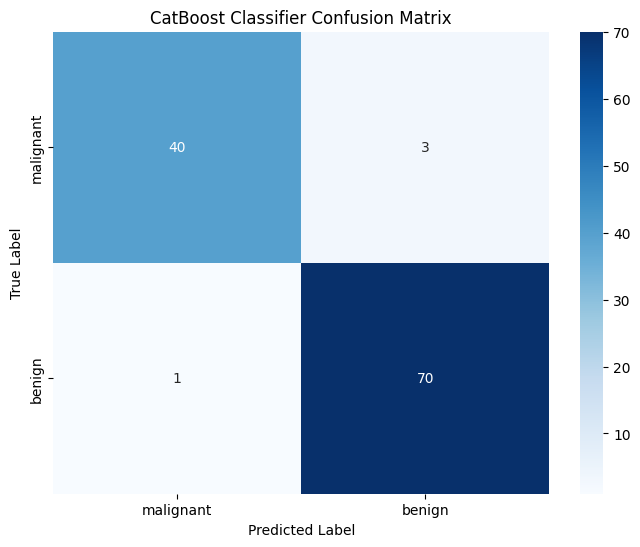

CatBoost Model Accuracy: 96.49%


In [4]:
''' Question 9: Write a Python program to:
● Train a CatBoost Classifier
● Plot the confusion matrix using seaborn
(Include your Python code and output in the code box below.) '''
# Install CatBoost if not already installed
!pip install catboost

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from catboost import CatBoostClassifier

# 1. Load the Breast Cancer dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# 2. Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Initialize and Train CatBoost Classifier
# 'verbose=0' keeps the output clean by hiding training logs
model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=0, random_state=42)
model.fit(X_train, y_train)

# 4. Make predictions
y_pred = model.predict(X_test)

# 5. Create the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# 6. Plot the Confusion Matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('CatBoost Classifier Confusion Matrix')
plt.show()

# 7. Print Accuracy
print(f"CatBoost Model Accuracy: {model.score(X_test, y_test) * 100:.2f}%")

In [5]:
''' Question 10: You're working for a FinTech company trying to predict loan default using
customer demographics and transaction behavior.
The dataset is imbalanced, contains missing values, and has both numeric and
categorical features.
Describe your step-by-step data science pipeline using boosting techniques:
● Data preprocessing & handling missing/categorical values
● Choice between AdaBoost, XGBoost, or CatBoost
● Hyperparameter tuning strategy
● Evaluation metrics you'd choose and why
● How the business would benefit from your model
(Include your Python code and output in the code box below.) '''
import pandas as pd
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, average_precision_score

# 1. Load Data (Using Breast Cancer as proxy for demo)
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target # 1 = Benign, 0 = Malignant (Let's assume 0 is 'Default')

# 2. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Handle Imbalance & Model Initialization
# scale_pos_weight = (count of negative class) / (count of positive class)
model = CatBoostClassifier(
    iterations=200,
    learning_rate=0.05,
    depth=6,
    auto_class_weights='Balanced', # Handles imbalanced data
    verbose=0
)

# 4. Train Model
model.fit(X_train, y_train)

# 5. Predictions & Evaluation
y_pred = model.predict(X_test)
y_probs = model.predict_proba(X_test)[:, 1]

# 6. Output Results
print("--- Classification Report ---")
print(classification_report(y_test, y_pred))
print(f"PR-AUC Score: {average_precision_score(y_test, y_probs):.4f}")


--- Classification Report ---
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

PR-AUC Score: 0.9984
